# Importação das Bibliotecas
Esta primeira cedula foi destinada a importação das bibliotecas utilizadas

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Abertura dos dados
Dados no formato txt com conteúdo em binário descrevendo um numpy.ndarray

In [2]:
dados = np.fromfile('dataAll.txt').reshape((1000, 3))

## Repartição dos dados de treino e teste

In [3]:
#importante ressaltar que a cada execução os valores serão diferentes
training_idx = np.random.randint(dados.shape[0], size=700)
test_idx = np.random.randint(dados.shape[0], size=300)
training, test = dados[training_idx,:], dados[test_idx,:]


In [21]:
x_training = np.array((training[0:,:2]))
y_training = np.array((training[0:,-1]))

In [22]:
x_training

array([[-642.8921, -680.6463],
       [-377.9071,  835.6983],
       [-753.4025,   57.0046],
       ...,
       [-822.3854, -549.6054],
       [ 950.65  , -699.4061],
       [ 314.2297,  343.8375]])

In [23]:
training

array([[-642.8921, -680.6463,    1.    ],
       [-377.9071,  835.6983,    0.    ],
       [-753.4025,   57.0046,    0.    ],
       ...,
       [-822.3854, -549.6054,    0.    ],
       [ 950.65  , -699.4061,    1.    ],
       [ 314.2297,  343.8375,    0.    ]])

In [24]:
x_test = np.array((test[0:,:2]))
y_test = np.array((test[0:,-1]))

In [37]:
type(x_test)

numpy.ndarray

# Grafico

Text(0.5, 1.0, 'Problema linearmente separavel')

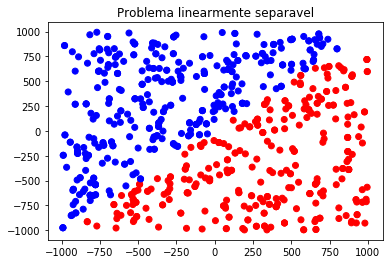

In [36]:

plt.scatter(training[:,1],training[:,0], c = y_training, cmap = mcolors.ListedColormap(["red", "blue"]))

plt.title("Problema linearmente separavel" )
#talvez ainda tenha correção no gráfico


Como pode se notar é um problema linearmente separavel